# EDA and modeling
We do both EDA and modeling in this notebook.

In [2]:
import pandas as pd
import numpy as np

In [3]:
main_df = pd.read_csv('new_dataset_for_model.csv')

In [4]:
main_df.head(15)

,Name,Power 5_3,Power 5_4,QBR_3,QBR_4,PAA_3,PAA_4,PLAYS_3,PLAYS_4,EPA_3,...,RAW_Diff,Season,ht,wt,forty,vertical,broad_jump,cone,shuttle,QB_score
0,Aaron Rodgers,1.0,1.0,72.685937,75.1,23.609231,29.5,418.009721,422.0,37.669882,...,2.127508,2005,74.0,223.0,4.710000,34.500000,110.000000,7.380000,4.343057,6.360598
1,Patrick Mahomes,1.0,1.0,79.100000,82.5,78.200000,103.0,751.000000,784.0,92.500000,...,5.000000,2017,74.0,225.0,4.800000,30.000000,114.000000,6.880000,4.080000,5.320093
2,Lamar Jackson,1.0,1.0,84.800000,85.4,84.500000,86.9,710.000000,714.0,88.600000,...,0.500000,2018,74.0,216.0,4.799668,31.162602,111.786008,7.122902,4.343057,4.796544
3,Matt Ryan,1.0,1.0,57.700000,63.5,6.400000,14.6,518.000000,798.0,28.500000,...,1.500000,2008,77.0,228.0,4.890000,31.162602,111.786008,7.400000,4.510000,3.293456
4,Matthew Stafford,1.0,1.0,65.400000,78.6,13.500000,35.7,432.000000,496.0,29.800000,...,9.900000,2009,74.0,225.0,4.810000,30.500000,107.000000,7.060000,4.470000,2.314543
5,Russell Wilson,1.0,1.0,67.800000,94.1,27.500000,100.3,716.000000,435.0,53.600000,...,31.800000,2012,71.0,204.0,4.530000,34.000000,118.000000,6.970000,4.090000,2.165475
6,Josh Allen,0.0,0.0,73.800000,60.1,57.000000,22.1,561.000000,382.0,73.000000,...,-9.600000,2018,77.0,237.0,4.750000,33.500000,119.000000,6.900000,4.400000,2.036716
7,Cam Newton,1.0,1.0,87.106981,90.0,74.829258,93.5,576.496819,582.0,96.506650,...,2.654650,2011,77.0,248.0,4.560000,35.000000,126.000000,6.920000,4.180000,1.961265
8,Kirk Cousins,1.0,1.0,64.200000,58.4,17.300000,7.2,416.000000,503.0,30.800000,...,-7.000000,2012,75.0,214.0,4.840000,28.500000,109.000000,7.050000,4.500000,1.951679
9,Joe Burrow,1.0,1.0,78.400000,94.9,42.300000,150.4,565.000000,684.0,57.700000,...,22.300000,2020,75.0,221.0,4.799668,31.162602,111.786008,7.122902,4.343057,1.910071


In [5]:
main_df.tail()

,Name,Power 5_3,Power 5_4,QBR_3,QBR_4,PAA_3,PAA_4,PLAYS_3,PLAYS_4,EPA_3,...,RAW_Diff,Season,ht,wt,forty,vertical,broad_jump,cone,shuttle,QB_score
320,D'Eriq King,0.0,1.0,84.8,78.0,95.0,47.0,504.0,509.0,96.1,...,-15.3,2022,69.0,196.0,4.799668,31.162602,111.786008,7.122902,4.343057,-0.578422
321,Mitch Leidner,1.0,1.0,61.3,55.2,4.0,3.8,555.0,454.0,26.8,...,0.3,2017,75.0,226.0,4.930000,34.500000,123.000000,6.960000,4.250000,-0.578422
322,Cullen Harper,1.0,1.0,63.4,46.8,10.5,-20.8,556.0,460.0,30.1,...,-16.4,2009,75.0,225.0,4.860000,30.000000,105.000000,7.430000,4.490000,-0.578422
323,Michael Pratt,0.0,0.0,66.0,65.3,37.5,38.0,460.0,411.0,50.7,...,2.3,2024,75.0,217.0,4.799668,36.000000,114.000000,7.200000,4.230000,-0.578422
324,Bryn Renner,1.0,1.0,61.0,64.4,17.2,10.5,529.0,303.0,36.2,...,0.5,2014,75.0,228.0,4.870000,25.500000,108.000000,7.220000,4.300000,-0.578422


In [6]:
main_df.sample(10)

,Name,Power 5_3,Power 5_4,QBR_3,QBR_4,PAA_3,PAA_4,PLAYS_3,PLAYS_4,EPA_3,...,RAW_Diff,Season,ht,wt,forty,vertical,broad_jump,cone,shuttle,QB_score
27,Kyler Murray,1.0,1.0,92.3334,95.4,114.044592,142.5,547.771033,553.0,128.346669,...,2.954522,2019,70.0,207.0,4.799668,31.162602,111.786008,7.122902,4.343057,0.974203
279,Aaron Murray,1.0,1.0,80.9000,88.1,51.100000,59.1,503.000000,443.0,61.300000,...,5.800000,2014,72.0,207.0,4.840000,31.162602,111.786008,7.122902,4.343057,-0.578422
170,Malik Willis,0.0,0.0,78.7000,70.0,67.700000,58.9,440.000000,585.0,76.300000,...,-9.200000,2022,73.0,219.0,4.799668,31.162602,111.786008,7.122902,4.343057,-0.090039
231,Zac Dysert,0.0,0.0,55.2000,60.3,18.800000,36.0,608.000000,632.0,42.200000,...,6.400000,2013,75.0,231.0,4.810000,31.162602,111.786008,7.122902,4.343057,-0.578422
239,Zach Smith,0.0,0.0,51.8000,50.8,0.100000,-5.7,554.000000,337.0,23.100000,...,-4.400000,2021,75.0,222.0,5.230000,29.500000,111.000000,7.260000,4.520000,-0.578422
81,Landry Jones,1.0,1.0,71.8000,81.1,52.200000,66.6,629.000000,613.0,66.100000,...,5.300000,2013,76.0,225.0,5.110000,31.000000,115.000000,7.120000,4.300000,0.078307
33,Jordan Love,0.0,0.0,67.8000,51.7,44.900000,9.7,505.000000,600.0,54.500000,...,-17.400000,2020,76.0,224.0,4.740000,35.500000,118.000000,7.210000,4.520000,0.611625
319,Nate Davis,0.0,0.0,57.8000,73.6,35.100000,74.9,601.000000,497.0,54.800000,...,18.000000,2009,73.0,226.0,4.950000,26.500000,99.000000,7.122902,4.343057,-0.578422
287,Kaleb Eleby,0.0,0.0,78.1000,61.4,34.500000,33.0,207.000000,505.0,39.400000,...,-18.700000,2022,73.0,208.0,4.799668,25.500000,111.000000,7.570000,4.343057,-0.578422
202,Josh Rosen,1.0,1.0,58.3000,64.1,5.700000,21.4,272.000000,536.0,17.000000,...,4.800000,2018,76.0,226.0,4.920000,31.000000,111.000000,7.090000,4.280000,-0.230063


In [7]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        325 non-null    object 
 1   Power 5_3   325 non-null    float64
 2   Power 5_4   325 non-null    float64
 3   QBR_3       325 non-null    float64
 4   QBR_4       325 non-null    float64
 5   PAA_3       325 non-null    float64
 6   PAA_4       325 non-null    float64
 7   PLAYS_3     325 non-null    float64
 8   PLAYS_4     325 non-null    float64
 9   EPA_3       325 non-null    float64
 10  EPA_4       325 non-null    float64
 11  PASS_3      325 non-null    float64
 12  PASS_4      325 non-null    float64
 13  RUN_3       325 non-null    float64
 14  RUN_4       325 non-null    float64
 15  SACK_3      325 non-null    float64
 16  SACK_4      325 non-null    float64
 17  PEN_3       325 non-null    float64
 18  PEN_4       325 non-null    float64
 19  RAW_3       325 non-null    f

In [8]:
# main_df['QB_score'] = main_df['QB_score'].fillna(main_df['QB_score'].min())

In [9]:
main_df = main_df.drop(columns = ['Season'])

In [10]:
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Power 5_3,325.0,0.750799,0.425144,0.000000,0.750799,1.000000,1.000000,1.000000
Power 5_4,325.0,0.747604,0.426950,0.000000,0.747604,1.000000,1.000000,1.000000
QBR_3,325.0,67.726410,13.346875,29.000000,58.361677,68.700000,77.900000,93.800000
QBR_4,325.0,69.901917,12.434865,33.200000,62.000000,70.600000,78.800000,96.100000
PAA_3,325.0,31.627629,30.973287,-46.700000,8.200000,31.627629,51.100000,119.900000
PAA_4,325.0,37.591054,32.035931,-34.700000,16.500000,36.300000,58.900000,150.400000
PLAYS_3,325.0,500.484545,112.514962,183.000000,432.867887,500.484545,566.000000,807.293656
PLAYS_4,325.0,514.175719,102.988363,240.000000,443.000000,514.175719,583.000000,815.000000
EPA_3,325.0,46.220876,27.612086,-15.100000,25.600000,46.220876,63.300000,128.346669
EPA_4,325.0,51.781470,27.957535,-8.400000,32.400000,51.400000,68.200000,147.900000


# Histograms

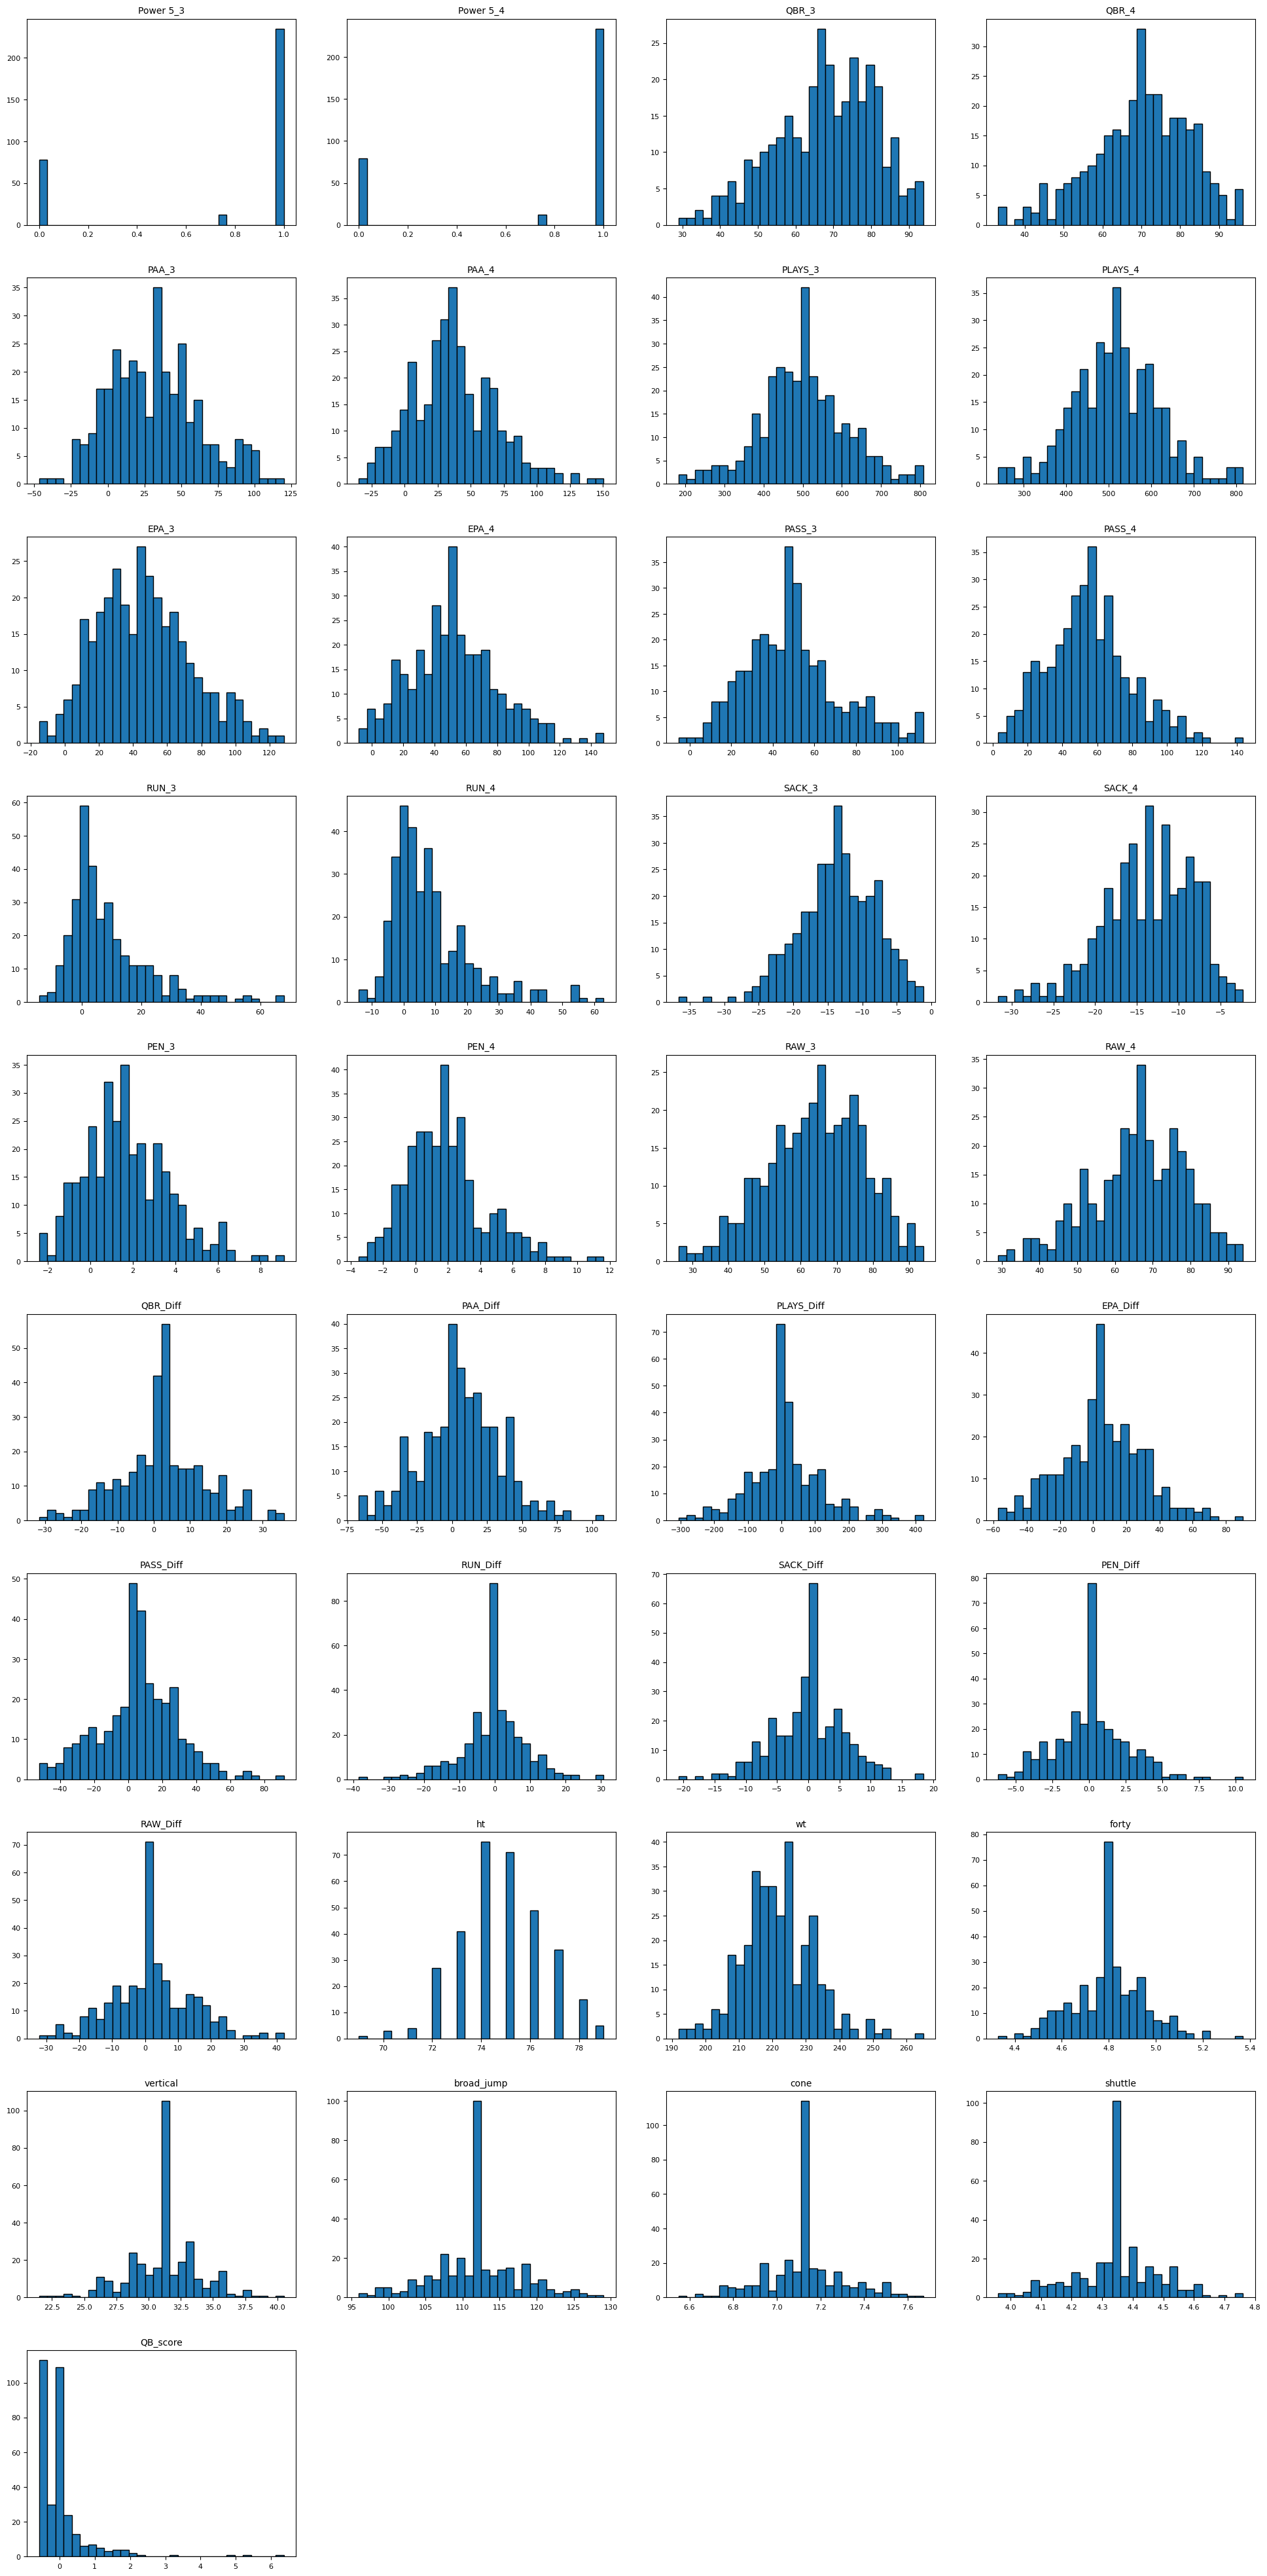

In [11]:
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = main_df.select_dtypes(include='number').columns
n_cols = 4  # number of plots per row
n_rows = int(np.ceil(len(numeric_cols) / n_cols))  # total number of rows

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(numeric_cols):
    axes[i].hist(main_df[col].dropna(), bins=30, edgecolor='black')
    axes[i].set_title(f'{col}', fontsize=10)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

# Turn off unused axes (in case 39 doesn't fill all 4x10 = 40 plots)
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

# Add padding
plt.tight_layout(pad=3.0)  # pad increases white space
plt.show()


# Histogram for target variable

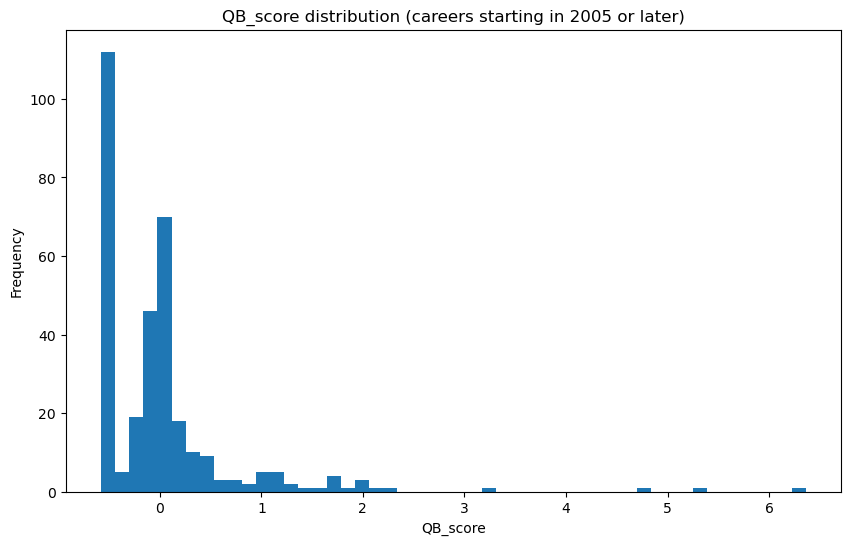

In [12]:
plt.figure(figsize=(10, 6))  # Width: 10 inches, Height: 6 inches
plt.hist(main_df['QB_score'], bins=50)
plt.title('QB_score distribution (careers starting in 2005 or later)')
plt.xlabel('QB_score')
plt.ylabel('Frequency')
plt.savefig('qb_score_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Which QBs played in a Super Bowl?
Adding a temporary binary classifier so we can see how good of a QB a team needs to get to the Super Bowl.

In [13]:
super_bowl_qbs = ['Patrick Mahomes', 'Jalen Hurts', 'Brock Purdy', 'Joe Burrow', 'Matthew Stafford', 'Jimmy Garoppolo',\
                 'Jared Goff', 'Nick Foles', 'Matt Ryan', 'Cam Newton', 'Russell Wilson', 'Joe Flacco', 'Colin Kaepernick',\
                 'Aaron Rodgers']

In [14]:
super_bowl_wins = ['Patrick Mahomes', 'Jalen Hurts', 'Matthew Stafford', 'Nick Foles', 'Russell Wilson', 'Joe Flacco', 'Aaron Rodgers']

In [15]:
main_df['Super_Bowl'] = np.where(main_df['Name'].isin(super_bowl_qbs), 1, 0)
main_df['Super_Bowl_Wins'] = np.where(main_df['Name'].isin(super_bowl_wins), 1, 0)

In [16]:
def classify_result(row):
    if row['Super_Bowl'] == 1 and row['Super_Bowl_Wins'] == 1:
        return "SB Winner"
    elif row['Super_Bowl'] == 1 and row['Super_Bowl_Wins'] == 0:
        return "SB Loser"
    else:
        return "No SB"

main_df['Super_Bowl_Result'] = main_df.apply(classify_result, axis=1)



In [17]:
import seaborn as sns

C:\Users\Owner\anaconda3\envs\nfl_fantasy_model\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


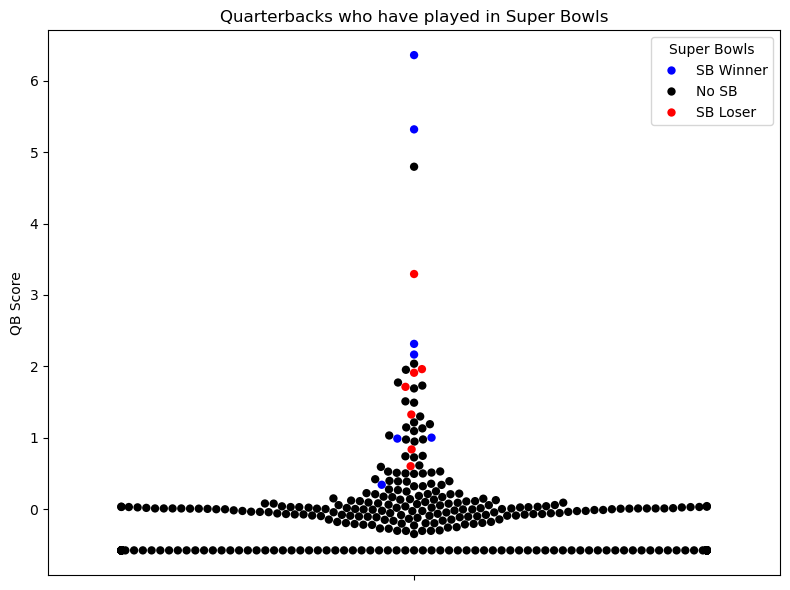

In [18]:
# Ensure 'Super_Bowl' is a string for color mapping
plt.figure(figsize=(8, 6))

sns.swarmplot(
    data=main_df,
    x=[""] * len(main_df),  # Single vertical column
    y="QB_score",
    hue="Super_Bowl_Result",
    size = 6,
    palette={
        "SB Winner": "blue",
        "SB Loser": "red",
        "No SB": "black"
    }
)

plt.xlabel("")
plt.ylabel("QB Score")
plt.title("Quarterbacks who have played in Super Bowls")
plt.legend(title="Super Bowls")

plt.tight_layout()
plt.savefig('qb_with_rookies.png', dpi=300, bbox_inches='tight')
plt.show()




In [19]:
main_df = main_df.drop(columns = ['Super_Bowl', 'Super_Bowl_Wins', 'Super_Bowl_Result'])

In [20]:
main_df.columns

Index(['Name', 'Power 5_3', 'Power 5_4', 'QBR_3', 'QBR_4', 'PAA_3', 'PAA_4',
       'PLAYS_3', 'PLAYS_4', 'EPA_3', 'EPA_4', 'PASS_3', 'PASS_4', 'RUN_3',
       'RUN_4', 'SACK_3', 'SACK_4', 'PEN_3', 'PEN_4', 'RAW_3', 'RAW_4',
       'QBR_Diff', 'PAA_Diff', 'PLAYS_Diff', 'EPA_Diff', 'PASS_Diff',
       'RUN_Diff', 'SACK_Diff', 'PEN_Diff', 'RAW_Diff', 'ht', 'wt', 'forty',
       'vertical', 'broad_jump', 'cone', 'shuttle', 'QB_score'],
      dtype='object')

In [21]:
corr_cols = ['Power 5_3', 'Power 5_4', 'QBR_3', 'QBR_4', 'PAA_3', 'PAA_4',\
       'PLAYS_3', 'PLAYS_4', 'EPA_3', 'EPA_4', 'PASS_3', 'PASS_4', 'RUN_3',\
       'RUN_4', 'SACK_3', 'SACK_4', 'PEN_3', 'PEN_4', 'RAW_3', 'RAW_4',\
     'QBR_Diff', 'PAA_Diff', 'PLAYS_Diff', 'EPA_Diff',\
       'PASS_Diff', 'RUN_Diff', 'SACK_Diff', 'PEN_Diff', 'RAW_Diff', 'ht',\
       'wt', 'forty', 'vertical', 'broad_jump', 'cone', 'shuttle', 'QB_score']

In [22]:
corr_df = main_df[corr_cols].corr()

# Correlation matrix

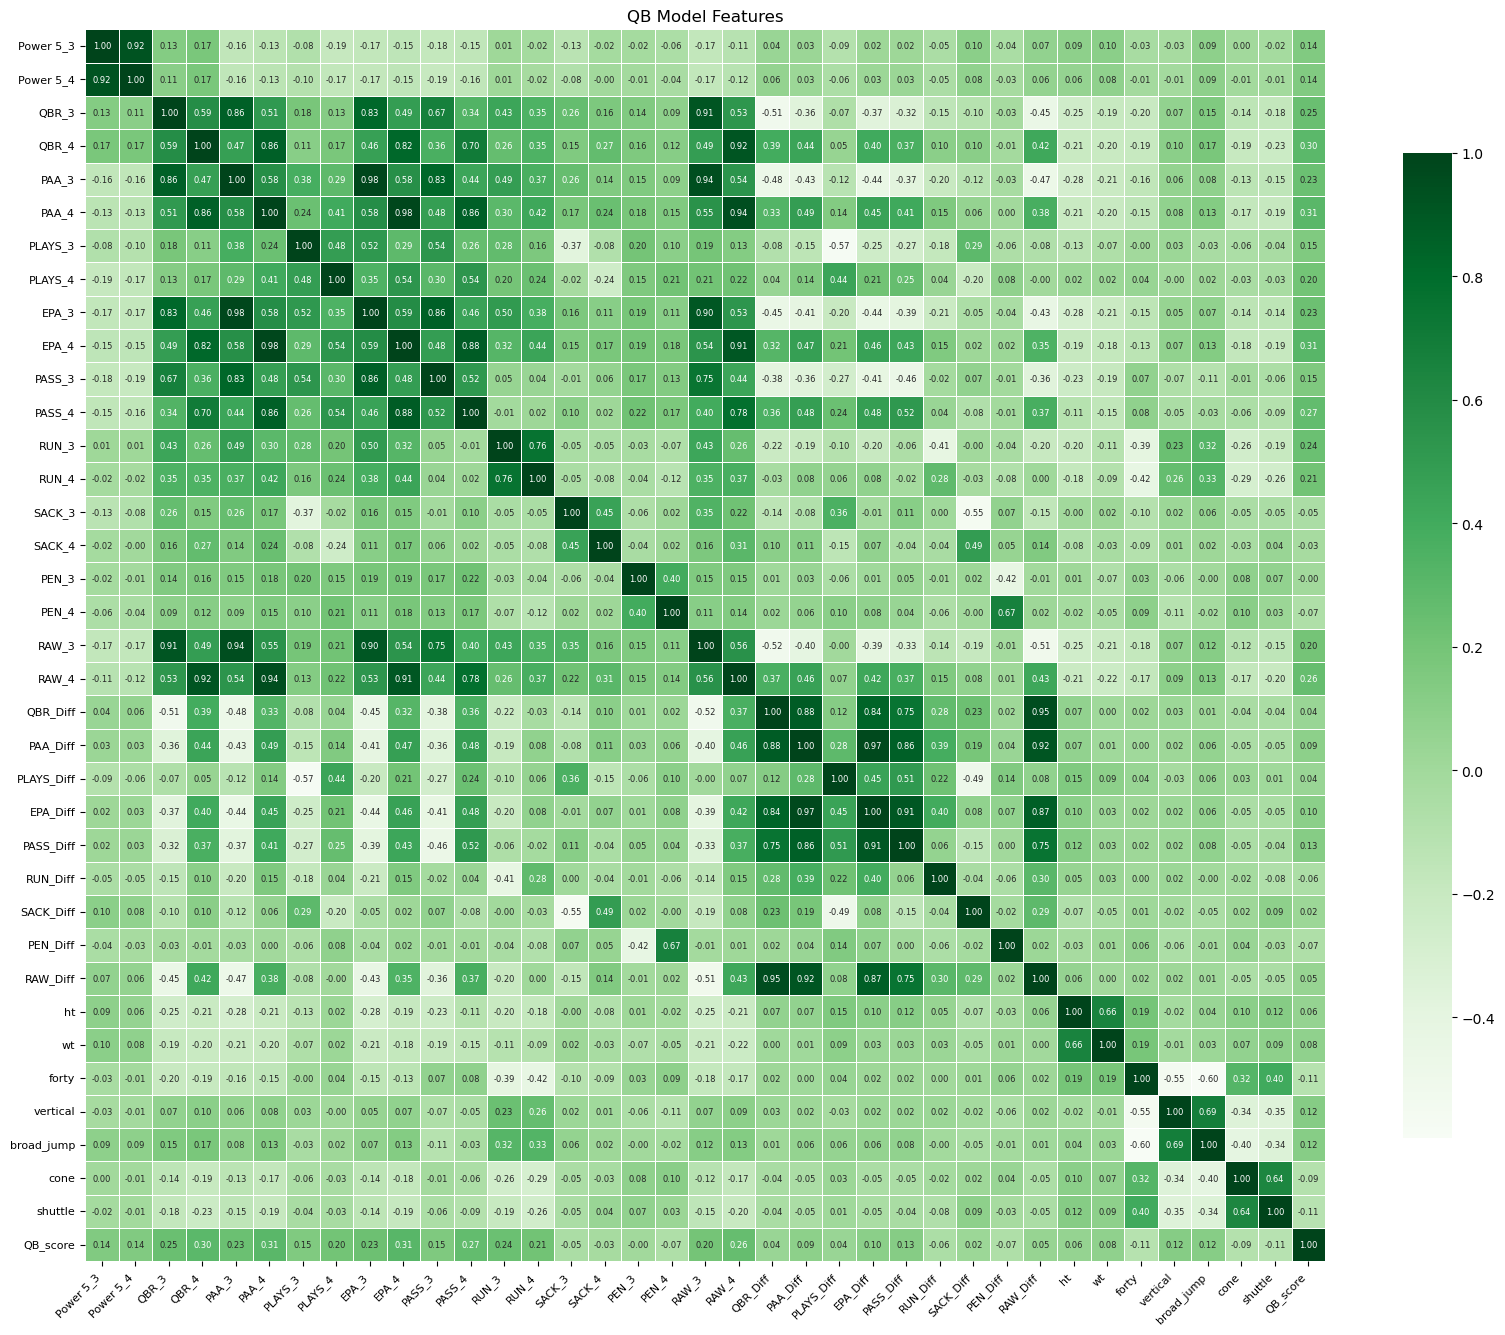

In [23]:
plt.figure(figsize=(20, 16))  # Further increase figure size for readability with 46 features
sns.heatmap(corr_df, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5,
            annot_kws={"size": 6},  # Smaller font size for annotations to avoid crowding
            cbar_kws={'shrink': 0.8})  # Shrink the color bar slightly
plt.xticks(rotation=45, ha='right', fontsize=8)  # Further reduce x-axis label size for readability
plt.yticks(rotation=0, fontsize=8)  # Reduce y-axis label size
plt.title('QB Model Features')  # Adjust title to match your model name
plt.savefig('correlation_heatmap_QB_success.png', dpi=300, bbox_inches='tight')  # Save the heatmap
plt.show()

# Listing correlations in order of absolute value

In [24]:
# Get correlation values with the target variable only
target_corr = corr_df['QB_score'].drop('QB_score')  # drop self-correlation

# Sort by absolute correlation (optional), descending
target_corr_sorted = target_corr.reindex(target_corr.abs().sort_values(ascending=False).index)

# Display
print(target_corr_sorted)

EPA_4         0.313190
PAA_4         0.307908
QBR_4         0.300868
PASS_4        0.269512
RAW_4         0.255644
QBR_3         0.245179
RUN_3         0.238086
PAA_3         0.233456
EPA_3         0.228982
RUN_4         0.210505
PLAYS_4       0.203720
RAW_3         0.196632
PASS_3        0.153933
PLAYS_3       0.149776
Power 5_3     0.144202
Power 5_4     0.142328
PASS_Diff     0.125900
vertical      0.124389
broad_jump    0.117533
shuttle      -0.112325
forty        -0.108066
EPA_Diff      0.096958
cone         -0.094651
PAA_Diff      0.091294
wt            0.083767
PEN_4        -0.069311
PEN_Diff     -0.066411
ht            0.057759
RUN_Diff     -0.056549
SACK_3       -0.051881
RAW_Diff      0.050812
QBR_Diff      0.039946
PLAYS_Diff    0.037623
SACK_4       -0.028103
SACK_Diff     0.024458
PEN_3        -0.002908
Name: QB_score, dtype: float64


In [25]:
import sklearn

In [26]:
main_df = main_df.set_index(['Name'])

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 

In [28]:
main_df['QB_score'].value_counts()

QB_score
-0.578422    112
-0.002558      1
-0.004596      1
-0.005168      1
-0.008805      1
            ... 
 0.111487      1
 0.107419      1
 0.099211      1
 0.092227      1
 0.020000      1
Name: count, Length: 214, dtype: int64

# Stratifying train-test split
Since about a third of the target variables are flat, or equal to the minimum value, we want to make sure that both the training and test sets match this distribution.

In [29]:
# STRATIFY TRAIN-TEST SPLIT ################

# # Create a binary indicator: 1 = above min score, 0 = min score
main_df['played'] = main_df['QB_score'] > main_df['QB_score'].min()

train_df, test_df = train_test_split(
    main_df, 
    test_size=0.2, 
    stratify=main_df['played'], 
    random_state=43
)


In [30]:
X_train = train_df.drop(columns = ['QB_score', 'played'])
y_train = train_df['QB_score']

In [31]:
X_test = test_df.drop(columns = ['QB_score', 'played'])
y_test = test_df['QB_score']

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
X_train_scaled = scaler.fit_transform(X_train)

In [35]:
X_test_scaled = scaler.transform(X_test)

In [36]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

print(X_train_scaled_df.mean().sort_values())
print("\n")
print(X_train_scaled_df.std().sort_values())


forty        -4.411855e-15
RAW_3        -1.427918e-15
cone         -7.651999e-16
RAW_4        -6.012285e-16
wt           -3.040303e-16
QBR_4        -1.708035e-16
PASS_4       -1.434750e-16
SACK_3       -1.332268e-16
SACK_Diff    -3.416071e-17
PAA_Diff     -1.366428e-17
PASS_Diff    -6.832142e-18
RAW_Diff     -3.416071e-18
EPA_Diff     -3.416071e-18
RUN_Diff      0.000000e+00
PLAYS_Diff    1.366428e-17
PEN_3         2.391250e-17
PEN_Diff      2.391250e-17
RUN_3         2.732857e-17
QBR_Diff      3.074464e-17
PEN_4         3.416071e-17
Power 5_4     3.416071e-17
EPA_4         4.099285e-17
RUN_4         4.099285e-17
PASS_3        5.380312e-17
PAA_4         6.148928e-17
PLAYS_3       9.564998e-17
SACK_4        9.564998e-17
Power 5_3     2.117964e-16
PAA_3         2.117964e-16
EPA_3         2.117964e-16
QBR_3         2.664535e-16
PLAYS_4       5.055785e-16
vertical      1.072646e-15
broad_jump    1.296399e-15
ht            3.368246e-15
shuttle       4.727842e-15
dtype: float64


Power 5_4  

# Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
base_LR = LinearRegression()

In [39]:
base_LR.fit(X_train_scaled, y_train)

LinearRegression()

In [40]:
base_LR_pred = base_LR.predict(X_test_scaled)

In [41]:
print(f"R_squared_train: {base_LR.score(X_train_scaled, y_train)}")
print(f"R_squared_test: {base_LR.score(X_test_scaled, y_test)}")
print(f"MAE: {mean_absolute_error(y_test, base_LR_pred)}")
print(f"MSE: {mean_squared_error(y_test, base_LR_pred)}")
rmse = np.sqrt(mean_squared_error(y_test, base_LR_pred))
print(f"RMSE: {rmse}")

R_squared_train: 0.25962440560383715
R_squared_test: -0.08765826095659568
MAE: 0.41657449813973024
MSE: 0.3324650472875835
RMSE: 0.5765978210916024


# Lasso Regression

In [42]:
from sklearn.linear_model import LassoCV, Lasso

lasso_model = LassoCV(cv=5, random_state=43, max_iter=100000)
lasso_model.fit(X_train_scaled, y_train)

print(f"Optimal alpha: {lasso_model.alpha_}")
print(f"Test R²: {lasso_model.score(X_test_scaled, y_test)}")


Optimal alpha: 0.03989017963827899
Test R²: 0.11141684584427047


In [43]:
best_lasso = Lasso(alpha=0.03989017963827899, random_state=43)
best_lasso.fit(X_train_scaled, y_train)  # Use the correct variable name
y_pred = best_lasso.predict(X_test_scaled)  # Use the correct variable name
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"best_lasso train R-squared: {best_lasso.score(X_train_scaled, y_train)}")
print(f"best_lasso test R-squared: {best_lasso.score(X_test_scaled, y_test)}")
print(f"best_lasso MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"best_lasso RMSE: {rmse}")
print(f"best_lasso MSE: {mean_squared_error(y_test, y_pred)}")

best_lasso train R-squared: 0.20739269902162294
best_lasso test R-squared: 0.11141684584427047
best_lasso MAE: 0.3834365065989804
best_lasso RMSE: 0.5211656735970752
best_lasso MSE: 0.2716136593358931


In [44]:
# Get feature names from the original unscaled training DataFrame
feature_names = X_train.columns  # <-- replace with your original feature DataFrame if named differently

# Get Lasso coefficients
lasso_coefs = lasso_model.coef_

# Match features to coefficients
import pandas as pd

lasso_results = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefs
})

# Get names of features with non-zero coefficients
kept_feature_names = lasso_results[lasso_results['Coefficient'] != 0]['Feature'].tolist()

# Print them
print("Features retained by Lasso (non-zero coefficients):")
for feature in kept_feature_names:
    print(feature)




Features retained by Lasso (non-zero coefficients):
Power 5_3
Power 5_4
QBR_3
QBR_4
PAA_3
PLAYS_4
EPA_4
PASS_4
RUN_3
SACK_3
PEN_4
ht
wt
vertical


# Ridge Regression

In [45]:
from sklearn.linear_model import RidgeCV, Ridge

In [46]:
# Define alphas (like Lasso would do internally)
alphas = np.logspace(-4, 2, 100)  # 100 values from 0.0001 to 100

ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

print(f"Optimal alpha (Ridge): {ridge_cv.alpha_}")
print(f"Test R² (Ridge): {ridge_cv.score(X_test_scaled, y_test)}")

Optimal alpha (Ridge): 100.0
Test R² (Ridge): 0.09355047741801026


In [47]:
best_ridge = Ridge(alpha=100, random_state=43)
best_ridge.fit(X_train_scaled, y_train)  # Use the correct variable name
y_pred = best_ridge.predict(X_test_scaled)  # Use the correct variable name
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"best_ridge train R-squared: {best_ridge.score(X_train_scaled, y_train)}")
print(f"best_ridge test R-squared: {best_ridge.score(X_test_scaled, y_test)}")
print(f"best_ridge MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"best_ridge RMSE: {rmse}")
print(f"best_ridge MSE: {mean_squared_error(y_test, y_pred)}")

best_ridge train R-squared: 0.22572305681139215
best_ridge test R-squared: 0.09355047741801026
best_ridge MAE: 0.38752635430589844
best_ridge RMSE: 0.5263790280325096
best_ridge MSE: 0.27707488115244955


# Elastic Net

In [48]:
from sklearn.linear_model import ElasticNet
# from sklearn.metrics import mean_squared_error
# import numpy as np

# Set alpha and l1_ratio manually
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000)

# Fit the model
elastic.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = elastic.predict(X_test_scaled)

# Evaluate
print(f"Train R²: {elastic.score(X_train_scaled, y_train)}")
print(f"Test R²: {elastic.score(X_test_scaled, y_test)}")

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")



Train R²: 0.0
Test R²: -0.02050893582448765
RMSE: 0.5585


In [49]:
# Define and fit ElasticNet with cross-validation
from sklearn.linear_model import ElasticNetCV

elastic_cv = ElasticNetCV(
    l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0],  # Try different mixes of L1 vs L2
    alphas=np.logspace(-3, 1, 50),           # Try alpha values from 0.001 to 10
    cv=5,
    max_iter=10000,
    random_state=42
)

elastic_cv.fit(X_train_scaled, y_train)

# Make predictions
y_pred = elastic_cv.predict(X_test_scaled)

# Evaluate
print(f"Optimal alpha: {elastic_cv.alpha_}")
print(f"Optimal l1_ratio: {elastic_cv.l1_ratio_}")
print(f"Test R²: {elastic_cv.score(X_test_scaled, y_test):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

Optimal alpha: 0.2811768697974228
Optimal l1_ratio: 0.1
Test R²: 0.1288
RMSE: 0.5160


In [50]:
# Get feature names from the original unscaled training data (a DataFrame)
feature_names = X_train.columns  # X_train is your unscaled DataFrame

# Get the coefficients from the ElasticNetCV model (a NumPy array)
coefs = elastic_cv.coef_

# Create a DataFrame to match coefficients with feature names
elastic_results = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
})

# Filter for non-zero coefficients
kept_features = elastic_results[elastic_results['Coefficient'] != 0]['Feature'].tolist()

# Print the retained feature names
print("Features retained by Elastic Net (non-zero coefficients):")
for feature in kept_features:
    print(feature)


Features retained by Elastic Net (non-zero coefficients):
Power 5_3
Power 5_4
QBR_3
QBR_4
PAA_3
PAA_4
PLAYS_4
EPA_4
PASS_4
RUN_3
RUN_4
SACK_3
PEN_3
PEN_4
ht
wt
vertical


In [51]:
y_test

Name
Jordan Jefferson    0.015484
Sam Howell          0.033332
Stephen McGee       0.028804
Mike White          0.023083
Russell Wilson      2.165475
                      ...   
Aaron Murray       -0.578422
Spencer Rattler    -0.221341
Anthony Morelli    -0.578422
Kellen Clemens     -0.058405
Scott Tolzien      -0.039287
Name: QB_score, Length: 65, dtype: float64

In [52]:
pd.set_option('display.max_rows', None)

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

rf = RandomForestRegressor(random_state=43)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print('Random Forest R2:', r2_score(y_test, rf_preds))
rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
print('Random Forest RMSE:', rmse)

Random Forest R2: -0.24006447937669084
Random Forest RMSE: 0.6156712862168995


In [54]:
from sklearn.model_selection import GridSearchCV

rf_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}

rf_cv = GridSearchCV(RandomForestRegressor(random_state=43),
                     rf_grid, cv=5, scoring='r2', n_jobs=-1)
rf_cv.fit(X_train, y_train)

print('Best RF params:', rf_cv.best_params_)
print('Best RF CV R2:', rf_cv.best_score_)


Best RF params: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Best RF CV R2: -0.11435952361495169


In [55]:
best_rf = RandomForestRegressor(max_depth=5, min_samples_split=5, n_estimators=200, random_state=43)
best_rf.fit(X_train_scaled, y_train)  # ← Don't forget to fit the model

best_rf_preds = best_rf.predict(X_test_scaled)  # ← Predict on features, not labels
rmse = np.sqrt(mean_squared_error(y_test, best_rf_preds))

print(f"best_RF test R-squared: {best_rf.score(X_test_scaled, y_test)}")
print(f"best_RF test RMSE: {rmse}")


best_RF test R-squared: -0.21262531909836135
best_RF test RMSE: 0.6088216411714297


# Gradient Boost

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=43)
gb.fit(X_train_scaled, y_train)

gb_preds = gb.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, gb_preds))

print('Gradient Boost R²:', r2_score(y_test, gb_preds))
print('Gradient Boost RMSE:', rmse)


Gradient Boost R²: -0.6799767945007471
Gradient Boost RMSE: 0.7166026452208116


In [57]:
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

gb_grid = GridSearchCV(
    estimator=gb,
    param_grid=gb_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

gb_grid.fit(X_train_scaled, y_train)

print("Best GB parameters:", gb_grid.best_params_)
print("Best GB cross-validated R²:", gb_grid.best_score_)

Best GB parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best GB cross-validated R²: -0.12867372211726197


In [58]:
best_gb = GradientBoostingRegressor(max_depth=3, learning_rate=.01, n_estimators=100, random_state=43)
best_gb.fit(X_train_scaled, y_train)  # ← Don't forget to fit the model

best_gb_preds = best_gb.predict(X_test_scaled)  # ← Predict on features, not labels
rmse = np.sqrt(mean_squared_error(y_test, best_gb_preds))

print(f"best_GB test R-squared: {best_gb.score(X_test_scaled, y_test)}")
print(f"best_GB test RMSE: {rmse}")

best_GB test R-squared: -0.26818576016825135
best_GB test RMSE: 0.6226130248439918


# XGBoost

In [59]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=43, verbosity=0)  # verbosity=0 hides training logs
xgb.fit(X_train_scaled, y_train)

xgb_preds = xgb.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))

print("XGBoost R²:", r2_score(y_test, xgb_preds))
print("XGBoost RMSE:", rmse)


XGBoost R²: -0.4476734992321796
XGBoost RMSE: 0.6652150675655534


In [60]:
# xgb_param_grid = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.01, 0.1],
#     'max_depth': [3, 5]
# }

# xgb_grid = GridSearchCV(
#     estimator=xgb,
#     param_grid=xgb_param_grid,
#     cv=5,
#     scoring='r2',
#     n_jobs=-1
# )

# xgb_grid.fit(X_train_scaled, y_train)

# print("Best XGB parameters:", xgb_grid.best_params_)
# print("Best XGB cross-validated R²:", xgb_grid.best_score_)

In [61]:
# Create a DataFrame comparing true vs predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Optional: add residuals (errors)
results_df['Residual'] = results_df['Actual'] - results_df['Predicted']

In [62]:
results_actual = results_df.sort_values(by = 'Actual', ascending = False)
results_pred = results_df.sort_values(by = 'Predicted', ascending = False)

In [63]:
results_pred.to_csv('test_set_predictions.csv', index = False)

# Test set results
Model predictions on the test set, which contains 65 samples.

In [64]:
results_pred

,Actual,Predicted,Residual
Name,,,
Jalen Hurts,1.000949,0.667816,0.333134
Collin Klein,-0.578422,0.624676,-1.203097
Deshaun Watson,1.031195,0.517346,0.513849
Vince Young,0.395266,0.467179,-0.071913
Caleb Williams,-0.068573,0.461252,-0.529825
Mac Jones,0.320626,0.428213,-0.107587
Case Keenum,0.339003,0.426413,-0.087410
Dwayne Haskins,-0.219112,0.415054,-0.634166
Jordan Lynch,-0.578422,0.404468,-0.982890


# Rookie predictions
Now the model makes predictions on unseen data, the top 14 incoming rookie quarterbacks in 2025.

In [65]:
rookie_df = pd.read_csv('rookies_with_combine.csv')

In [66]:
rookie_df

,Name,Power 5_3,Power 5_4,QBR_3,QBR_4,PAA_3,PAA_4,PLAYS_3,PLAYS_4,EPA_3,...,PEN_Diff,RAW_Diff,Season,ht,wt,forty,vertical,broad_jump,cone,shuttle
0,Brady Cook,1.0,1.0,77.200000,74.0,57.200000,34.2,499.000000,394.0,72.900000,...,1.6000,-5.500000,2025,74,214.0,4.590000,37.000000,128.000000,7.010000,4.170000
1,Cam Ward,1.0,1.0,65.100000,88.0,29.400000,95.9,650.000000,538.0,50.800000,...,4.5000,24.900000,2025,74,219.0,4.802115,31.118644,111.751073,7.127804,4.348128
2,Dillon Gabriel,1.0,1.0,87.300000,86.5,90.100000,83.0,531.000000,507.0,95.700000,...,-2.6000,-0.800000,2025,71,205.0,4.802115,31.118644,111.751073,7.127804,4.348128
3,Jalen Milroe,1.0,1.0,83.600000,82.8,52.600000,49.8,442.000000,486.0,66.300000,...,2.5000,-3.100000,2025,74,217.0,4.802115,31.118644,111.751073,7.127804,4.348128
4,Jaxson Dart,1.0,1.0,76.700000,84.7,46.000000,72.7,482.000000,516.0,59.700000,...,0.3000,8.200000,2025,74,223.0,4.802115,31.118644,111.751073,7.127804,4.348128
5,Kurtis Rourke,0.0,1.0,59.700000,85.7,27.100000,61.2,408.000000,357.0,41.800000,...,-2.1000,19.000000,2025,76,220.0,4.802115,31.118644,111.751073,7.127804,4.348128
6,Kyle McCord,1.0,1.0,83.700000,77.0,47.200000,75.8,407.000000,670.0,55.800000,...,1.2000,-0.600000,2025,75,218.0,4.802115,31.118644,111.751073,7.127804,4.348128
7,Max Brosmer,1.0,1.0,63.365095,63.4,13.549104,16.1,439.413964,481.0,29.866957,...,0.8917,0.398878,2025,74,217.0,4.802115,31.118644,111.751073,7.127804,4.348128
8,Quinn Ewers,1.0,1.0,78.700000,71.3,48.600000,16.2,439.000000,433.0,59.600000,...,-0.7000,-16.400000,2025,74,214.0,4.802115,31.118644,111.751073,7.127804,4.348128
9,Riley Leonard,1.0,0.0,72.100000,78.9,7.500000,51.8,251.000000,450.0,15.900000,...,2.8000,19.100000,2025,76,216.0,4.802115,31.118644,111.751073,7.127804,4.348128


In [67]:
main_df.columns

Index(['Power 5_3', 'Power 5_4', 'QBR_3', 'QBR_4', 'PAA_3', 'PAA_4', 'PLAYS_3',
       'PLAYS_4', 'EPA_3', 'EPA_4', 'PASS_3', 'PASS_4', 'RUN_3', 'RUN_4',
       'SACK_3', 'SACK_4', 'PEN_3', 'PEN_4', 'RAW_3', 'RAW_4', 'QBR_Diff',
       'PAA_Diff', 'PLAYS_Diff', 'EPA_Diff', 'PASS_Diff', 'RUN_Diff',
       'SACK_Diff', 'PEN_Diff', 'RAW_Diff', 'ht', 'wt', 'forty', 'vertical',
       'broad_jump', 'cone', 'shuttle', 'QB_score', 'played'],
      dtype='object')

In [68]:
rookie_df.columns

Index(['Name', 'Power 5_3', 'Power 5_4', 'QBR_3', 'QBR_4', 'PAA_3', 'PAA_4',
       'PLAYS_3', 'PLAYS_4', 'EPA_3', 'EPA_4', 'PASS_3', 'PASS_4', 'RUN_3',
       'RUN_4', 'SACK_3', 'SACK_4', 'PEN_3', 'PEN_4', 'RAW_3', 'RAW_4',
       'QBR_Diff', 'PAA_Diff', 'PLAYS_Diff', 'EPA_Diff', 'PASS_Diff',
       'RUN_Diff', 'SACK_Diff', 'PEN_Diff', 'RAW_Diff', 'Season', 'ht', 'wt',
       'forty', 'vertical', 'broad_jump', 'cone', 'shuttle'],
      dtype='object')

In [69]:
rookie_df = rookie_df.set_index(['Name'])

In [70]:
rookie_df = rookie_df.drop(columns = ['Season'])

In [71]:
rookie_scaled = scaler.transform(rookie_df)
rookie_preds = elastic_cv.predict(rookie_scaled)


In [72]:
rookie_df['preds'] = rookie_preds

In [73]:
rookie_df = rookie_df.sort_values(by = ['preds'], ascending = False)

In [74]:
rookie_df[['preds']]

,preds
Name,
Jaxson Dart,0.437769
Cam Ward,0.426429
Jalen Milroe,0.381722
Shedeur Sanders,0.371537
Kyle McCord,0.343011
Dillon Gabriel,0.271081
Will Howard,0.212202
Tyler Shough,0.039499
Brady Cook,0.009157


In [75]:
rmse = 0.5160

In [76]:
rookie_df['floor'] = rookie_df['preds'] - rmse
rookie_df['ceiling'] = rookie_df['preds'] + rmse

In [77]:
rookie_df

,Power 5_3,Power 5_4,QBR_3,QBR_4,PAA_3,PAA_4,PLAYS_3,PLAYS_4,EPA_3,EPA_4,...,ht,wt,forty,vertical,broad_jump,cone,shuttle,preds,floor,ceiling
Name,,,,,,,,,,,,,,,,,,,,,
Jaxson Dart,1.0,1.0,76.700000,84.7,46.000000,72.7,482.000000,516.0,59.700000,78.5,...,74,223.0,4.802115,31.118644,111.751073,7.127804,4.348128,0.437769,-0.078231,0.953769
Cam Ward,1.0,1.0,65.100000,88.0,29.400000,95.9,650.000000,538.0,50.800000,103.2,...,74,219.0,4.802115,31.118644,111.751073,7.127804,4.348128,0.426429,-0.089571,0.942429
Jalen Milroe,1.0,1.0,83.600000,82.8,52.600000,49.8,442.000000,486.0,66.300000,60.5,...,74,217.0,4.802115,31.118644,111.751073,7.127804,4.348128,0.381722,-0.134278,0.897722
Shedeur Sanders,1.0,1.0,63.000000,78.2,28.300000,72.9,598.000000,600.0,47.100000,82.8,...,74,212.0,4.802115,31.118644,111.751073,7.127804,4.348128,0.371537,-0.144463,0.887537
Kyle McCord,1.0,1.0,83.700000,77.0,47.200000,75.8,407.000000,670.0,55.800000,94.1,...,75,218.0,4.802115,31.118644,111.751073,7.127804,4.348128,0.343011,-0.172989,0.859011
Dillon Gabriel,1.0,1.0,87.300000,86.5,90.100000,83.0,531.000000,507.0,95.700000,89.7,...,71,205.0,4.802115,31.118644,111.751073,7.127804,4.348128,0.271081,-0.244919,0.787081
Will Howard,1.0,1.0,75.300000,83.0,40.600000,49.3,466.000000,407.0,53.200000,56.8,...,76,236.0,4.802115,31.500000,112.000000,7.130000,4.330000,0.212202,-0.303798,0.728202
Tyler Shough,1.0,1.0,74.200000,75.5,25.600000,39.8,246.000000,463.0,34.200000,53.9,...,77,219.0,4.630000,32.000000,117.000000,7.127804,4.348128,0.039499,-0.476501,0.555499
Brady Cook,1.0,1.0,77.200000,74.0,57.200000,34.2,499.000000,394.0,72.900000,40.9,...,74,214.0,4.590000,37.000000,128.000000,7.010000,4.170000,0.009157,-0.506843,0.525157


In [78]:
main_df.head()

,Power 5_3,Power 5_4,QBR_3,QBR_4,PAA_3,PAA_4,PLAYS_3,PLAYS_4,EPA_3,EPA_4,...,RAW_Diff,ht,wt,forty,vertical,broad_jump,cone,shuttle,QB_score,played
Name,,,,,,,,,,,,,,,,,,,,,
Aaron Rodgers,1.0,1.0,72.685937,75.1,23.609231,29.5,418.009721,422.0,37.669882,42.0,...,2.127508,74.0,223.0,4.710000,34.500000,110.000000,7.380000,4.343057,6.360598,True
Patrick Mahomes,1.0,1.0,79.100000,82.5,78.200000,103.0,751.000000,784.0,92.500000,116.0,...,5.000000,74.0,225.0,4.800000,30.000000,114.000000,6.880000,4.080000,5.320093,True
Lamar Jackson,1.0,1.0,84.800000,85.4,84.500000,86.9,710.000000,714.0,88.600000,99.4,...,0.500000,74.0,216.0,4.799668,31.162602,111.786008,7.122902,4.343057,4.796544,True
Matt Ryan,1.0,1.0,57.700000,63.5,6.400000,14.6,518.000000,798.0,28.500000,47.7,...,1.500000,77.0,228.0,4.890000,31.162602,111.786008,7.400000,4.510000,3.293456,True
Matthew Stafford,1.0,1.0,65.400000,78.6,13.500000,35.7,432.000000,496.0,29.800000,49.8,...,9.900000,74.0,225.0,4.810000,30.500000,107.000000,7.060000,4.470000,2.314543,True


This function finds the quarterback with the most similar score to each rookie QB's predicted score.

In [79]:
def closest_name(value, comp_series):
    diff = (comp_series - value).abs()
    return diff.idxmin()


In [80]:
comp_series = main_df['QB_score']

rookie_df['pred_comp'] = rookie_df['preds'].apply(lambda x: closest_name(x, comp_series))
rookie_df['floor_comp'] = rookie_df['floor'].apply(lambda x: closest_name(x, comp_series))
rookie_df['ceiling_comp'] = rookie_df['ceiling'].apply(lambda x: closest_name(x, comp_series))

In [81]:
rookie_df['pred_comp_score'] = rookie_df['pred_comp'].map(comp_series)
rookie_df['floor_comp_score'] = rookie_df['floor_comp'].map(comp_series)
rookie_df['ceiling_comp_score'] = rookie_df['ceiling_comp'].map(comp_series)

In [82]:
rookie_df

,Power 5_3,Power 5_4,QBR_3,QBR_4,PAA_3,PAA_4,PLAYS_3,PLAYS_4,EPA_3,EPA_4,...,shuttle,preds,floor,ceiling,pred_comp,floor_comp,ceiling_comp,pred_comp_score,floor_comp_score,ceiling_comp_score
Name,,,,,,,,,,,,,,,,,,,,,
Jaxson Dart,1.0,1.0,76.700000,84.7,46.000000,72.7,482.000000,516.0,59.700000,78.5,...,4.348128,0.437769,-0.078231,0.953769,Daniel Jones,Dennis Dixon,Jameis Winston,0.418503,-0.077542,0.946466
Cam Ward,1.0,1.0,65.100000,88.0,29.400000,95.9,650.000000,538.0,50.800000,103.2,...,4.348128,0.426429,-0.089571,0.942429,Daniel Jones,Malik Willis,Jameis Winston,0.418503,-0.090039,0.946466
Jalen Milroe,1.0,1.0,83.600000,82.8,52.600000,49.8,442.000000,486.0,66.300000,60.5,...,4.348128,0.381722,-0.134278,0.897722,Jason Campbell,Ian Book,Jameis Winston,0.384429,-0.136019,0.946466
Shedeur Sanders,1.0,1.0,63.000000,78.2,28.300000,72.9,598.000000,600.0,47.100000,82.8,...,4.348128,0.371537,-0.144463,0.887537,Jason Campbell,Mike Kafka,Jimmy Garoppolo,0.384429,-0.144701,0.836322
Kyle McCord,1.0,1.0,83.700000,77.0,47.200000,75.8,407.000000,670.0,55.800000,94.1,...,4.348128,0.343011,-0.172989,0.859011,Nick Foles,John Skelton,Jimmy Garoppolo,0.340697,-0.179392,0.836322
Dillon Gabriel,1.0,1.0,87.300000,86.5,90.100000,83.0,531.000000,507.0,95.700000,89.7,...,4.348128,0.271081,-0.244919,0.787081,Robert Griffin,Andrew Walter,Alex Smith,0.275573,-0.253166,0.745698
Will Howard,1.0,1.0,75.300000,83.0,40.600000,49.3,466.000000,407.0,53.200000,56.8,...,4.330000,0.212202,-0.303798,0.728202,Brock Osweiler,Ryan Lindley,Carson Wentz,0.211020,-0.304134,0.724254
Tyler Shough,1.0,1.0,74.200000,75.5,25.600000,39.8,246.000000,463.0,34.200000,53.9,...,4.348128,0.039499,-0.476501,0.555499,Drew Stanton,Sean Canfield,Marcus Mariota,0.040315,-0.578422,0.527205
Brady Cook,1.0,1.0,77.200000,74.0,57.200000,34.2,499.000000,394.0,72.900000,40.9,...,4.170000,0.009157,-0.506843,0.525157,Sean Renfree,Sean Canfield,Jake Browning,0.009160,-0.578422,0.525091


# Rookie comps
This dataframe shows the NFL quarterback that each rookie compares to based on his predicted QB_score. Then we have the Elastic Net model's rmse to the prediction to get a ceiling, the best-case scenario for each rookie QB. Then we subtract the rmse to get each QB's floor, the worse-case scenario for each rookie QB.

In [83]:
rookie_df[['pred_comp', 'floor_comp', 'ceiling_comp']]

,pred_comp,floor_comp,ceiling_comp
Name,,,
Jaxson Dart,Daniel Jones,Dennis Dixon,Jameis Winston
Cam Ward,Daniel Jones,Malik Willis,Jameis Winston
Jalen Milroe,Jason Campbell,Ian Book,Jameis Winston
Shedeur Sanders,Jason Campbell,Mike Kafka,Jimmy Garoppolo
Kyle McCord,Nick Foles,John Skelton,Jimmy Garoppolo
Dillon Gabriel,Robert Griffin,Andrew Walter,Alex Smith
Will Howard,Brock Osweiler,Ryan Lindley,Carson Wentz
Tyler Shough,Drew Stanton,Sean Canfield,Marcus Mariota
Brady Cook,Sean Renfree,Sean Canfield,Jake Browning


In [84]:
rookie_comps = rookie_df[['pred_comp', 'floor_comp', 'ceiling_comp']]

In [85]:
rookie_comps.to_csv('rookie_comps.csv', index = False)

In [86]:
rookie_df = rookie_df.rename(columns = {'preds': 'QB_score'})

In [87]:
rookie_df['Rookie'] = 1

In [88]:
all_qbs = pd.concat([main_df, rookie_df])

In [89]:
all_qbs['Rookie'] = all_qbs['Rookie'].fillna(0)

In [90]:
all_qbs.tail()

,Power 5_3,Power 5_4,QBR_3,QBR_4,PAA_3,PAA_4,PLAYS_3,PLAYS_4,EPA_3,EPA_4,...,played,floor,ceiling,pred_comp,floor_comp,ceiling_comp,pred_comp_score,floor_comp_score,ceiling_comp_score,Rookie
Name,,,,,,,,,,,,,,,,,,,,,
Kurtis Rourke,0.0,1.0,59.700000,85.7,27.100000,61.2,408.000000,357.0,41.800000,62.1,...,NaN,-0.541091,0.490909,David Blough,Sean Canfield,Teddy Bridgewater,-0.025505,-0.578422,0.493559,1.0
Quinn Ewers,1.0,1.0,78.700000,71.3,48.600000,16.2,439.000000,433.0,59.600000,31.4,...,NaN,-0.577798,0.454202,Clayton Tune,Sean Canfield,Daniel Jones,-0.061016,-0.578422,0.418503,1.0
Riley Leonard,1.0,0.0,72.100000,78.9,7.500000,51.8,251.000000,450.0,15.900000,61.2,...,NaN,-0.647516,0.384484,Ian Book,Sean Canfield,Jason Campbell,-0.136019,-0.578422,0.384429,1.0
Max Brosmer,1.0,1.0,63.365095,63.4,13.549104,16.1,439.413964,481.0,29.866957,34.0,...,NaN,-0.718656,0.313344,Ryan Finley,Sean Canfield,Tyrod Taylor,-0.203363,-0.578422,0.319612,1.0
Seth Henigan,0.0,0.0,67.900000,57.0,49.800000,32.8,562.000000,578.0,69.400000,51.9,...,NaN,-0.803993,0.228007,Will Levis,Sean Canfield,Justin Fields,-0.298639,-0.578422,0.223578,1.0


C:\Users\Owner\anaconda3\envs\nfl_fantasy_model\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


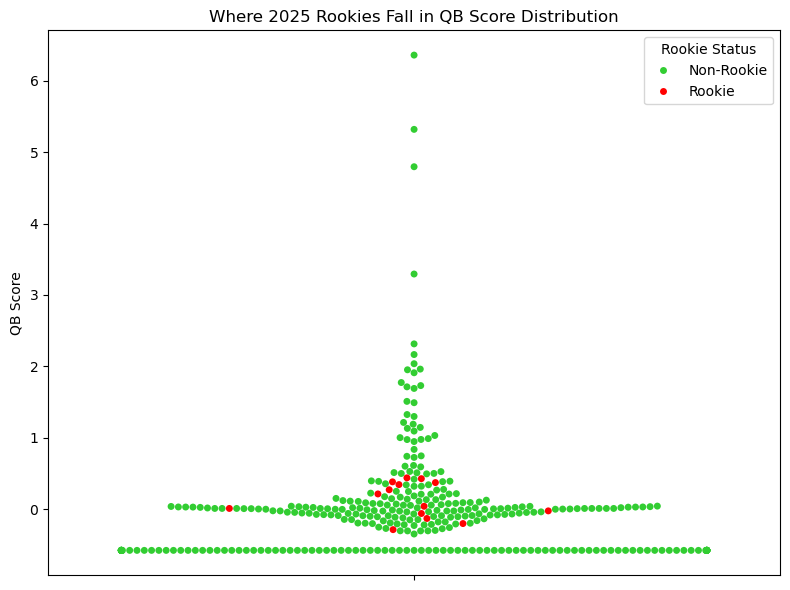

In [91]:
# Create a column for labeling rookies
all_qbs['Rookie_Label'] = all_qbs['Rookie'].apply(lambda x: 'Rookie' if x == 1.0 else 'Non-Rookie')


plt.figure(figsize=(8, 6))

sns.swarmplot(
    data=all_qbs,
    x=[""] * len(all_qbs),  # Stack all points in one column
    y="QB_score",
    hue="Rookie_Label",
    size=5,
    palette={
        "Rookie": "red",
        "Non-Rookie": "limegreen"
    }
)

plt.xlabel("")
plt.ylabel("QB Score")
plt.title("Where 2025 Rookies Fall in QB Score Distribution")
plt.legend(title="Rookie Status")

plt.tight_layout()
plt.savefig('qb_with_rookies.png', dpi=300, bbox_inches='tight')
plt.show()